## Notebook imports and pkgs

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# statement for export the generated graphics
%matplotlib inline

## Example 1 - A simple cost function
$$ f(x) = x^2 + x+1 $$

In [2]:
def f(x):
    return x**2 + x+1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)

<function matplotlib.pyplot.show(close=None, block=None)>

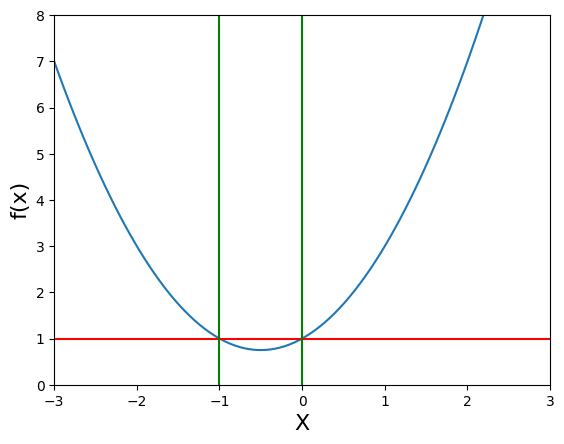

In [4]:
# Plot
plt.ylim(0, 8)
plt.xlim(-3,3)
plt.xlabel("X", fontsize =16)
plt.ylabel("f(x)", fontsize= 16)
plt.plot(x_1, f(x_1))
plt.axhline(y=1, color="red")
plt.axvline(x=0, color="green")
plt.axvline(x=-1,  color="green")
plt.show

## Slope and derivative

## Power rule - derivative
$$ \frac{d}{dx}\,x^n = n\cdot n^{n-1} $$

In [5]:
def df(x):
    return 2*x+1

<function matplotlib.pyplot.show(close=None, block=None)>

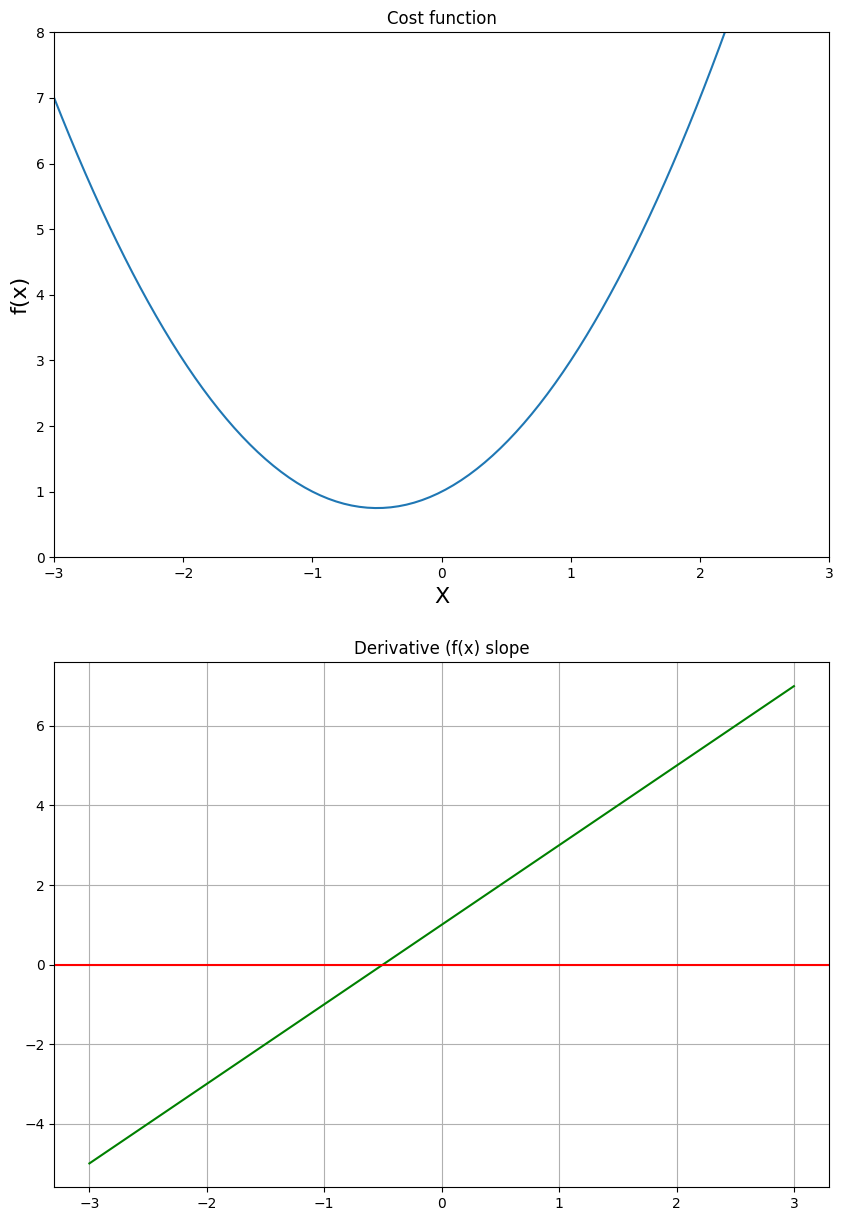

In [6]:
# Plot function and derivative together
plt.figure(figsize=[10,15])

plt.subplot(2,1,1)

plt.ylim(0, 8)
plt.xlim(-3,3)
plt.title("Cost function")
plt.xlabel("X", fontsize =16)
plt.ylabel("f(x)", fontsize= 16)
plt.plot(x_1, f(x_1))

plt.subplot(2,1,2)
plt.title("Derivative (f(x) slope")
plt.grid()
plt.plot(x_1, df(x_1), color="green")
plt.axhline(y=0, color="red")


plt.show


## Gradient descent with loops

In [7]:
new_x = 3
prev_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list =[new_x]
slope_list = [df(new_x)]

for n in range (500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multiplier * gradient
    step_size = abs(new_x-prev_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print("Number of cicles:", n)
        break
    
print("The local minimum occurs at: ", new_x)
print("Slope - df(x) is", df(new_x))
print("The cost is: ", f(new_x))

Number of cicles: 61
The local minimum occurs at:  -0.4999965672099885
Slope - df(x) is 6.8655800230521535e-06
The cost is:  0.750000000011784


<function matplotlib.pyplot.show(close=None, block=None)>

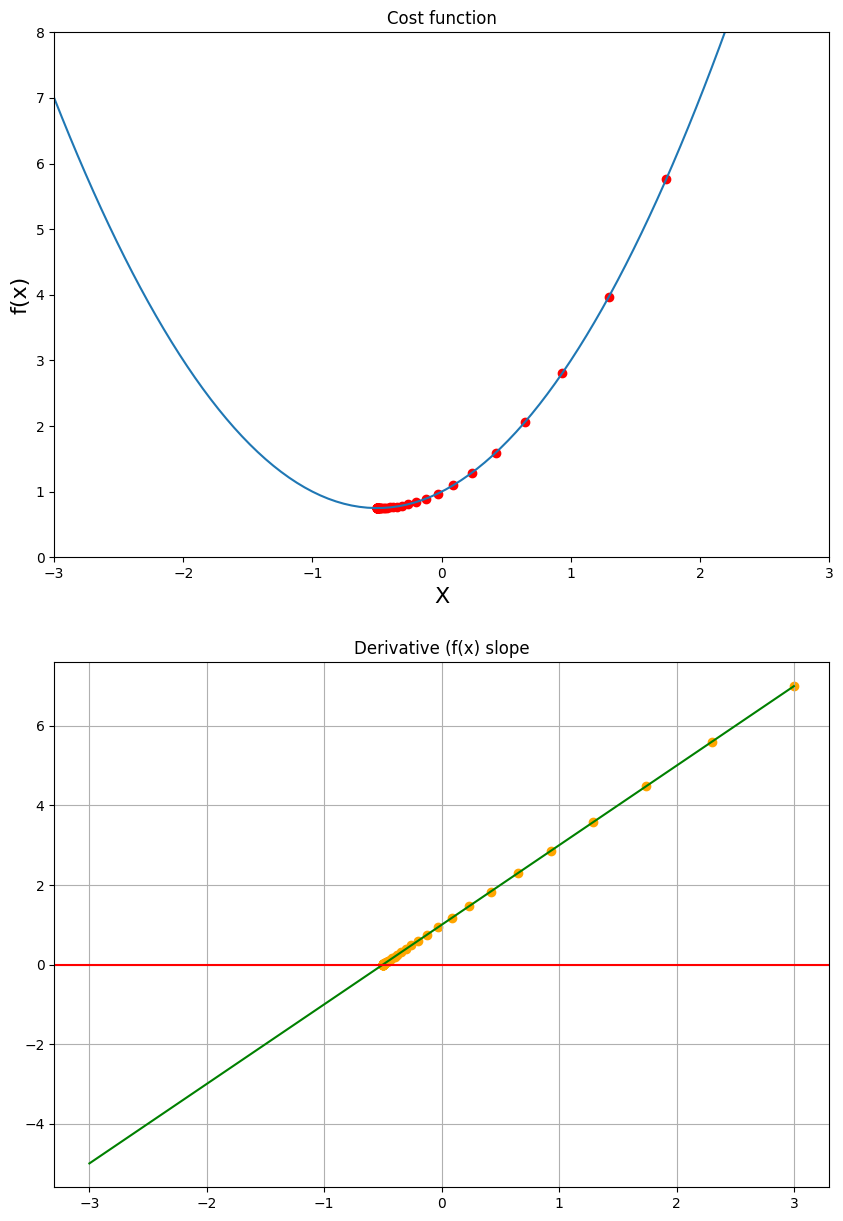

In [8]:
# Plot gradient descent super impress

plt.figure(figsize=[10,15])

# chart 1 cost function
plt.subplot(2,1,1)
plt.ylim(0, 8)
plt.xlim(-3,3)
plt.title("Cost function")
plt.xlabel("X", fontsize =16)
plt.ylabel("f(x)", fontsize= 16)
plt.plot(x_1, f(x_1))


# experimental data
values = np.array(x_list)
plt.scatter(x_list, f(values), color = "red" )

# chart 2 - derivative
plt.subplot(2,1,2)
plt.title("Derivative (f(x) slope")
plt.grid()
plt.plot(x_1, df(x_1), color="green")
plt.axhline(y=0, color="red")

# experimental data

plt.scatter(x_list,  slope_list, color = "orange" )


plt.show


## Example 2 - Multiple Minima vs Initial Guess
$$ g(x)= x^4 - 4x^2 + 5 $$

In [9]:
# Data and functions
x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4-4*x**2+5

def dg(x):
    return 4*x**3-8*x

<function matplotlib.pyplot.show(close=None, block=None)>

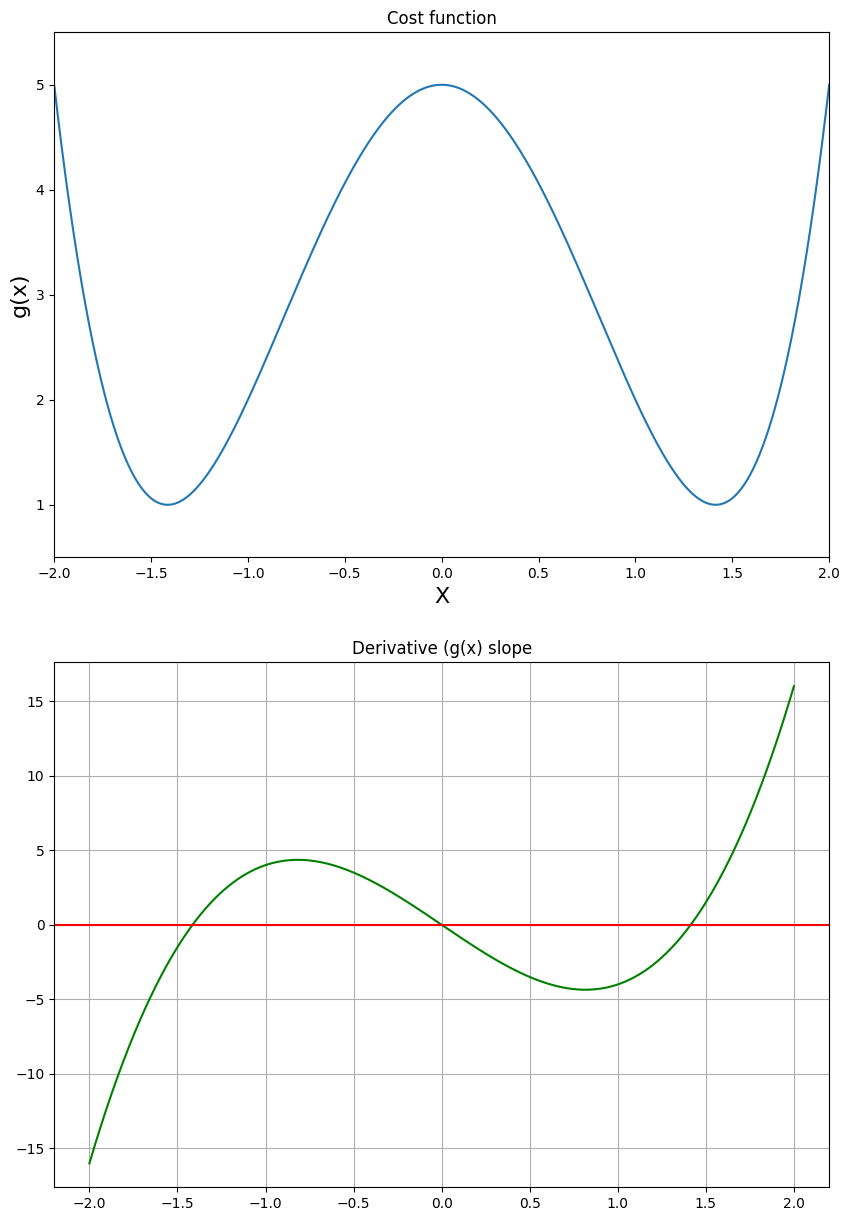

In [10]:
# Plot function and derivative together
plt.figure(figsize=[10,15])

plt.subplot(2,1,1)

plt.ylim(0.5 , 5.5)
plt.xlim(-2,2)
plt.title("Cost function")
plt.xlabel("X", fontsize =16)
plt.ylabel("g(x)", fontsize= 16)
plt.plot(x_2, g(x_2))

plt.subplot(2,1,2)
plt.title("Derivative (g(x) slope")
plt.grid()
plt.plot(x_2, dg(x_2), color="green")
plt.axhline(y=0, color="red")

plt.show


In [11]:
# Gradient cescent function

def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):

    new_x = initial_guess
    x_list =[new_x]
    slope_list = [df(new_x)]

    for n in range (max_iter):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - multiplier * gradient
        step_size = abs(new_x-prev_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            break
    return new_x, x_list, slope_list

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print("local min: ", local_min )
print("number of steps: ", len(list_x ))

local min:  -1.4120887490901561
number of steps:  34


<function matplotlib.pyplot.show(close=None, block=None)>

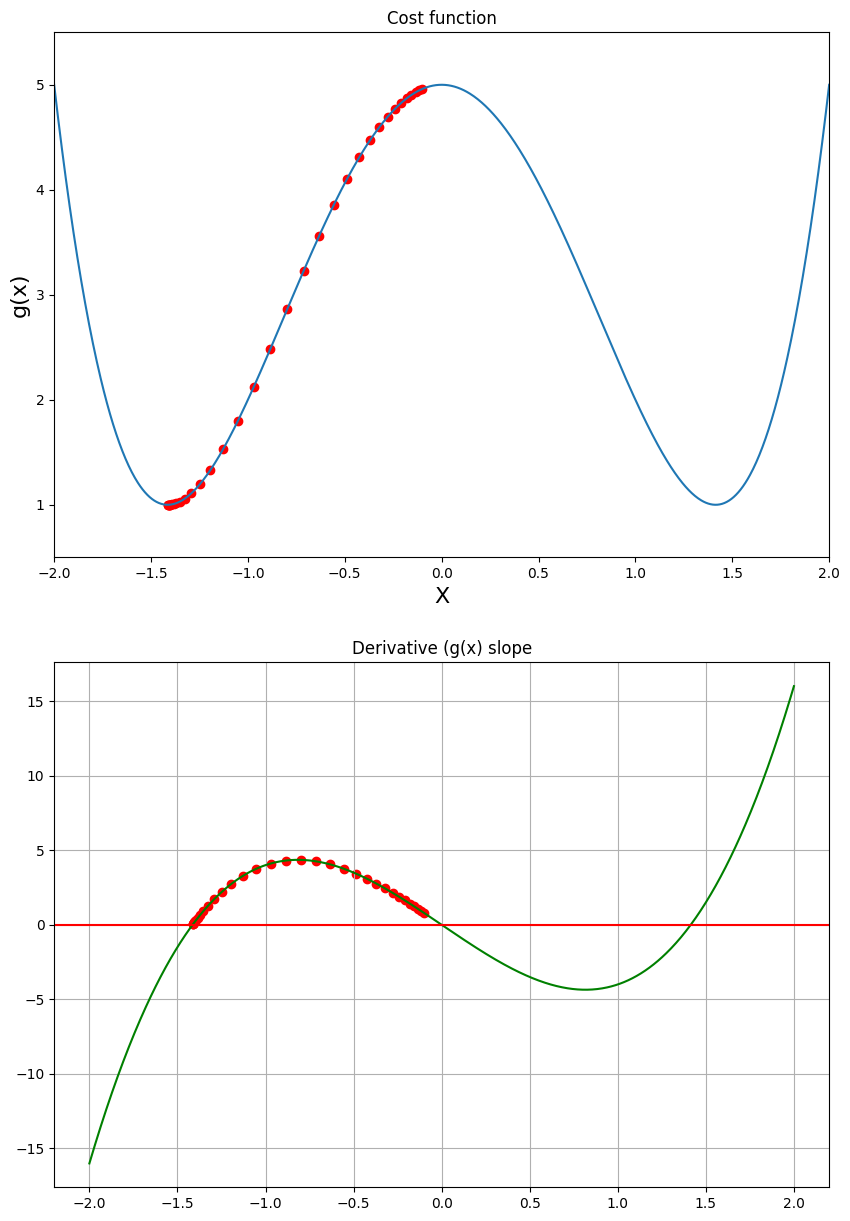

In [12]:
# call gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)

# Plot function, derivative and scatterplottogether
plt.figure(figsize=[10,15])

plt.subplot(2,1,1)

plt.ylim(0.5 , 5.5)
plt.xlim(-2,2)
plt.title("Cost function")
plt.xlabel("X", fontsize =16)
plt.ylabel("g(x)", fontsize= 16)
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color ='red')

plt.subplot(2,1,2)
plt.title("Derivative (g(x) slope")
plt.grid()
plt.plot(x_2, dg(x_2), color="green")
plt.axhline(y=0, color="red")
plt.scatter(list_x,  deriv_list, color ='red')

plt.show


## Example - 3 Divergence and Overflow  
$$ h(x)= x^5 -2x^4 +2 $$

In [13]:
# Generate data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3 

<function matplotlib.pyplot.show(close=None, block=None)>

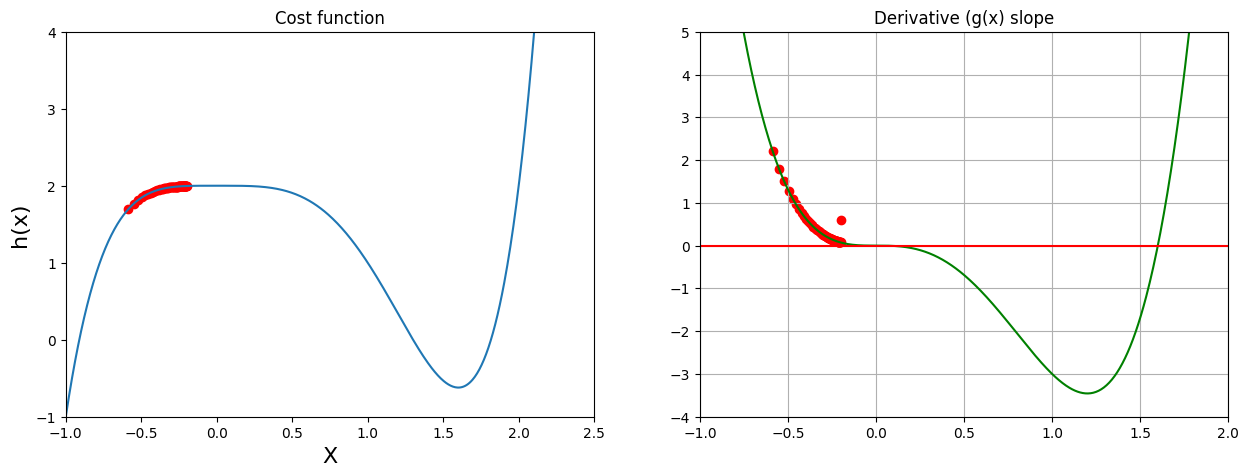

In [14]:
# call gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=60)

# Plot function, derivative and scatterplottogether
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.xlim(-1, 2.5)
plt.ylim(-1 , 4)
plt.title("Cost function")
plt.xlabel("X", fontsize =16)
plt.ylabel("h(x)", fontsize= 16)
plt.plot(x_3, h(x_3))
plt.scatter(list_x, h(np.array(list_x)), color ='red')

plt.subplot(1,2,2)
plt.title("Derivative (g(x) slope")
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4 , 5)
plt.plot(x_3, dh(x_3), color="green")
plt.axhline(y=0, color="red")
plt.scatter(list_x,  deriv_list, color ='red')

plt.show


## Learning rate

steps: 254


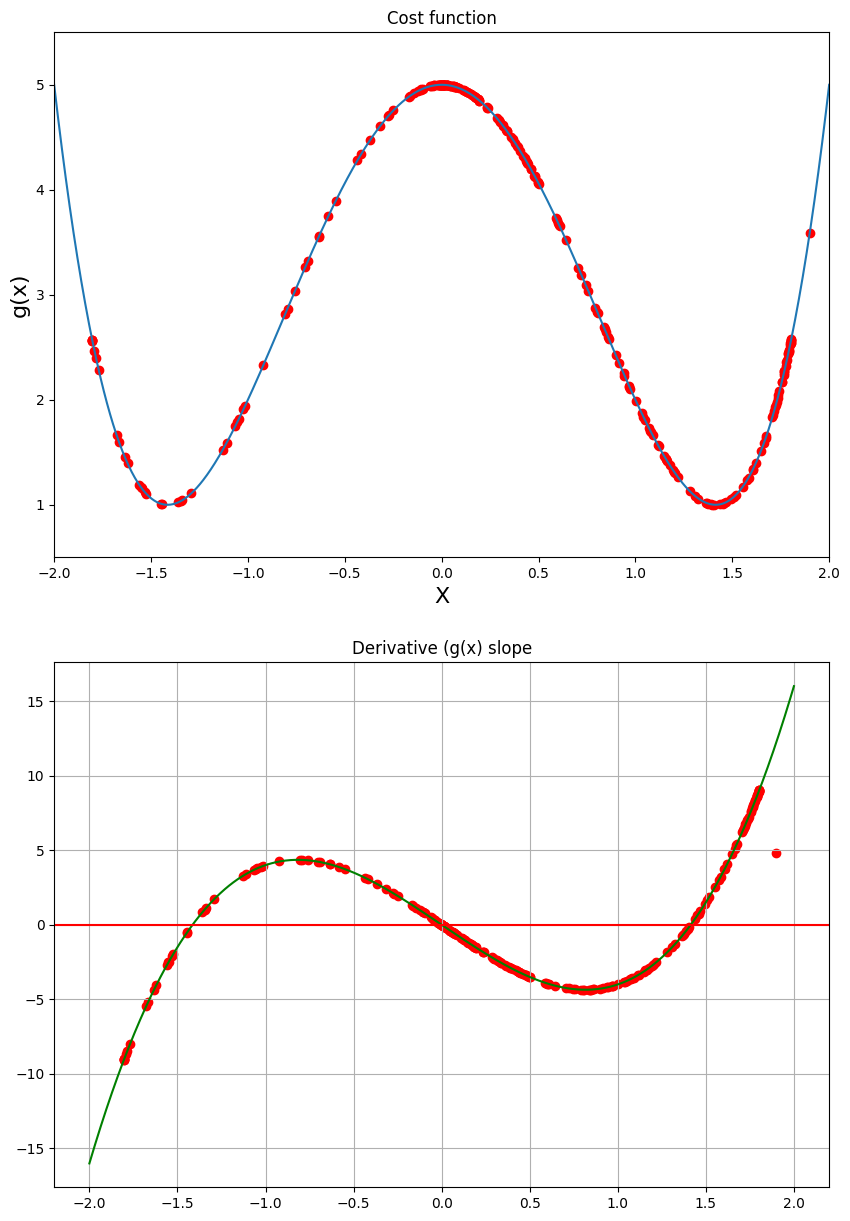

In [15]:
# call gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier= 0.2 )

# Plot function, derivative and scatterplottogether
plt.figure(figsize=[10,15])

plt.subplot(2,1,1)

plt.ylim(0.5 , 5.5)
plt.xlim(-2,2)
plt.title("Cost function")
plt.xlabel("X", fontsize =16)
plt.ylabel("g(x)", fontsize= 16)
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color ='red')

plt.subplot(2,1,2)
plt.title("Derivative (g(x) slope")
plt.grid()
plt.plot(x_2, dg(x_2), color="green")
plt.axhline(y=0, color="red")
plt.scatter(list_x,  deriv_list, color ='red')

plt.show
print('steps:', len(list_x))


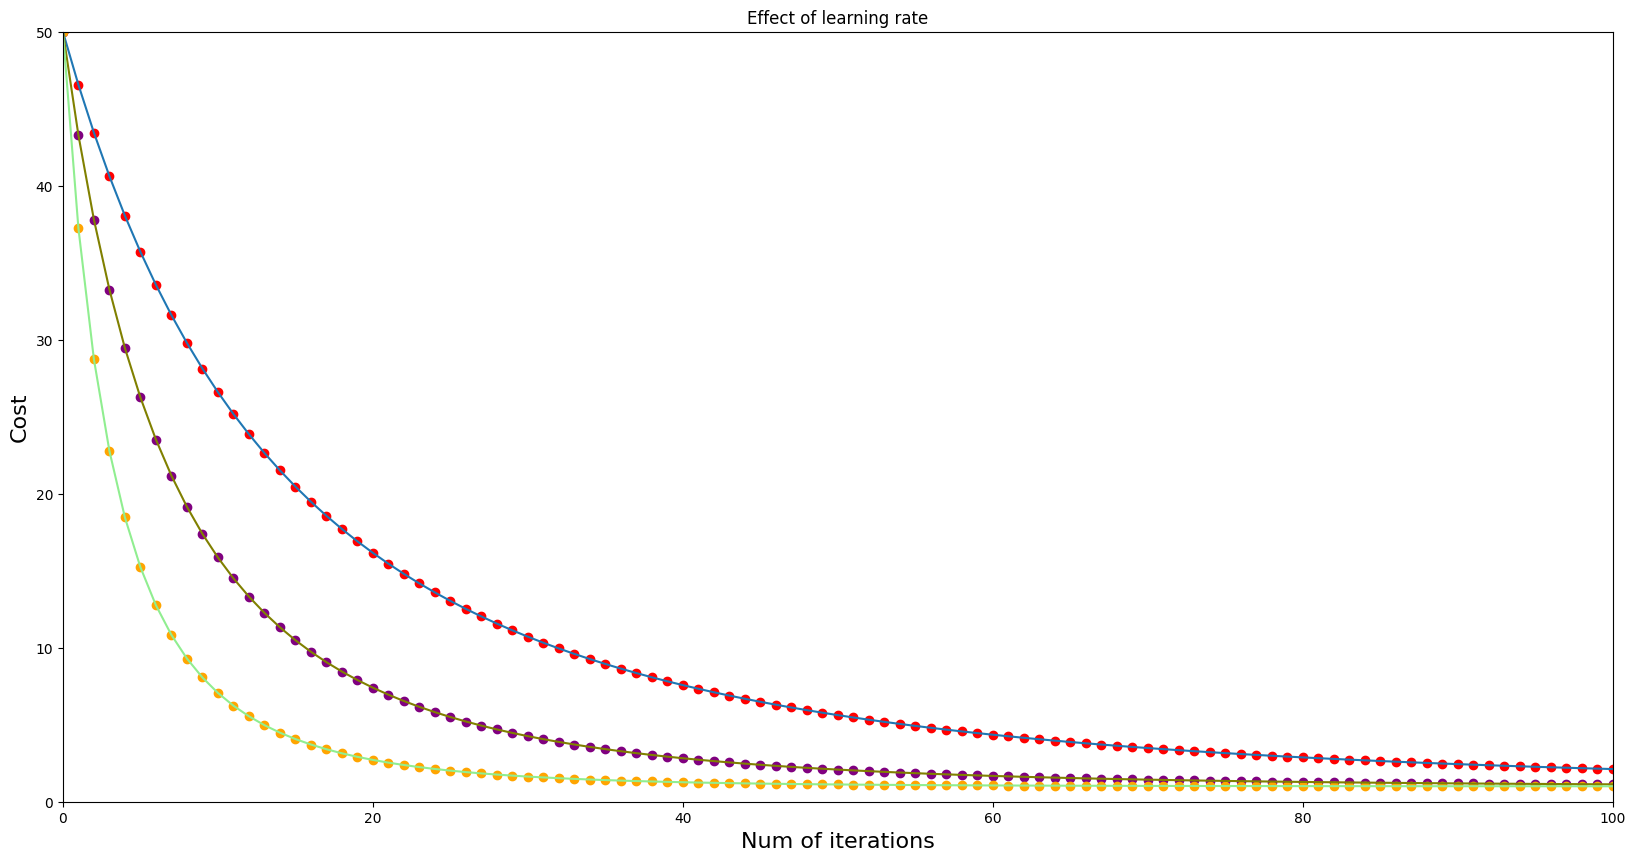

In [16]:
# call gradient descent function multiple times
n=100
low_gamma= gradient_descent(derivative_func=dg, initial_guess=3, multiplier= 0.0005, precision=0.0001, max_iter=n)
mid_gamma= gradient_descent(derivative_func=dg, initial_guess=3, multiplier= 0.001, precision=0.0001, max_iter=n)
high_gamma= gradient_descent(derivative_func=dg, initial_guess=3, multiplier= 0.002, precision=0.0001, max_iter=n)

# Plot function, derivative and scatterplottogether
plt.figure(figsize=[20,10])

plt.xlim(0 , n)
plt.ylim(0,50)
plt.title("Effect of learning rate")
plt.xlabel("Num of iterations", fontsize =16)
plt.ylabel("Cost", fontsize= 16)

# Make data
# For Y axis 
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# For X axis list from 0 to n+1
iteration_list = list(range(0,n+1))

plt.plot(iteration_list, g(low_values))
plt.scatter(iteration_list, g(low_values), color ='red')
plt.plot(iteration_list, g(mid_values), color= 'olive')
plt.scatter(iteration_list, g(mid_values), color ='purple')
plt.plot(iteration_list, g(high_values),color= 'lightGreen')
plt.scatter(iteration_list, g(high_values), color ='orange')
plt.show()

#Example 4 3d data visualization

Minimise equation $$ f(x, y) = \frac{1}{3^{-x^2 -y^2}+1}  $$

General $$ (x, y) = \frac{1}{r + 1}  $$ where $r$ is $3^{-x^2 -y^2}$

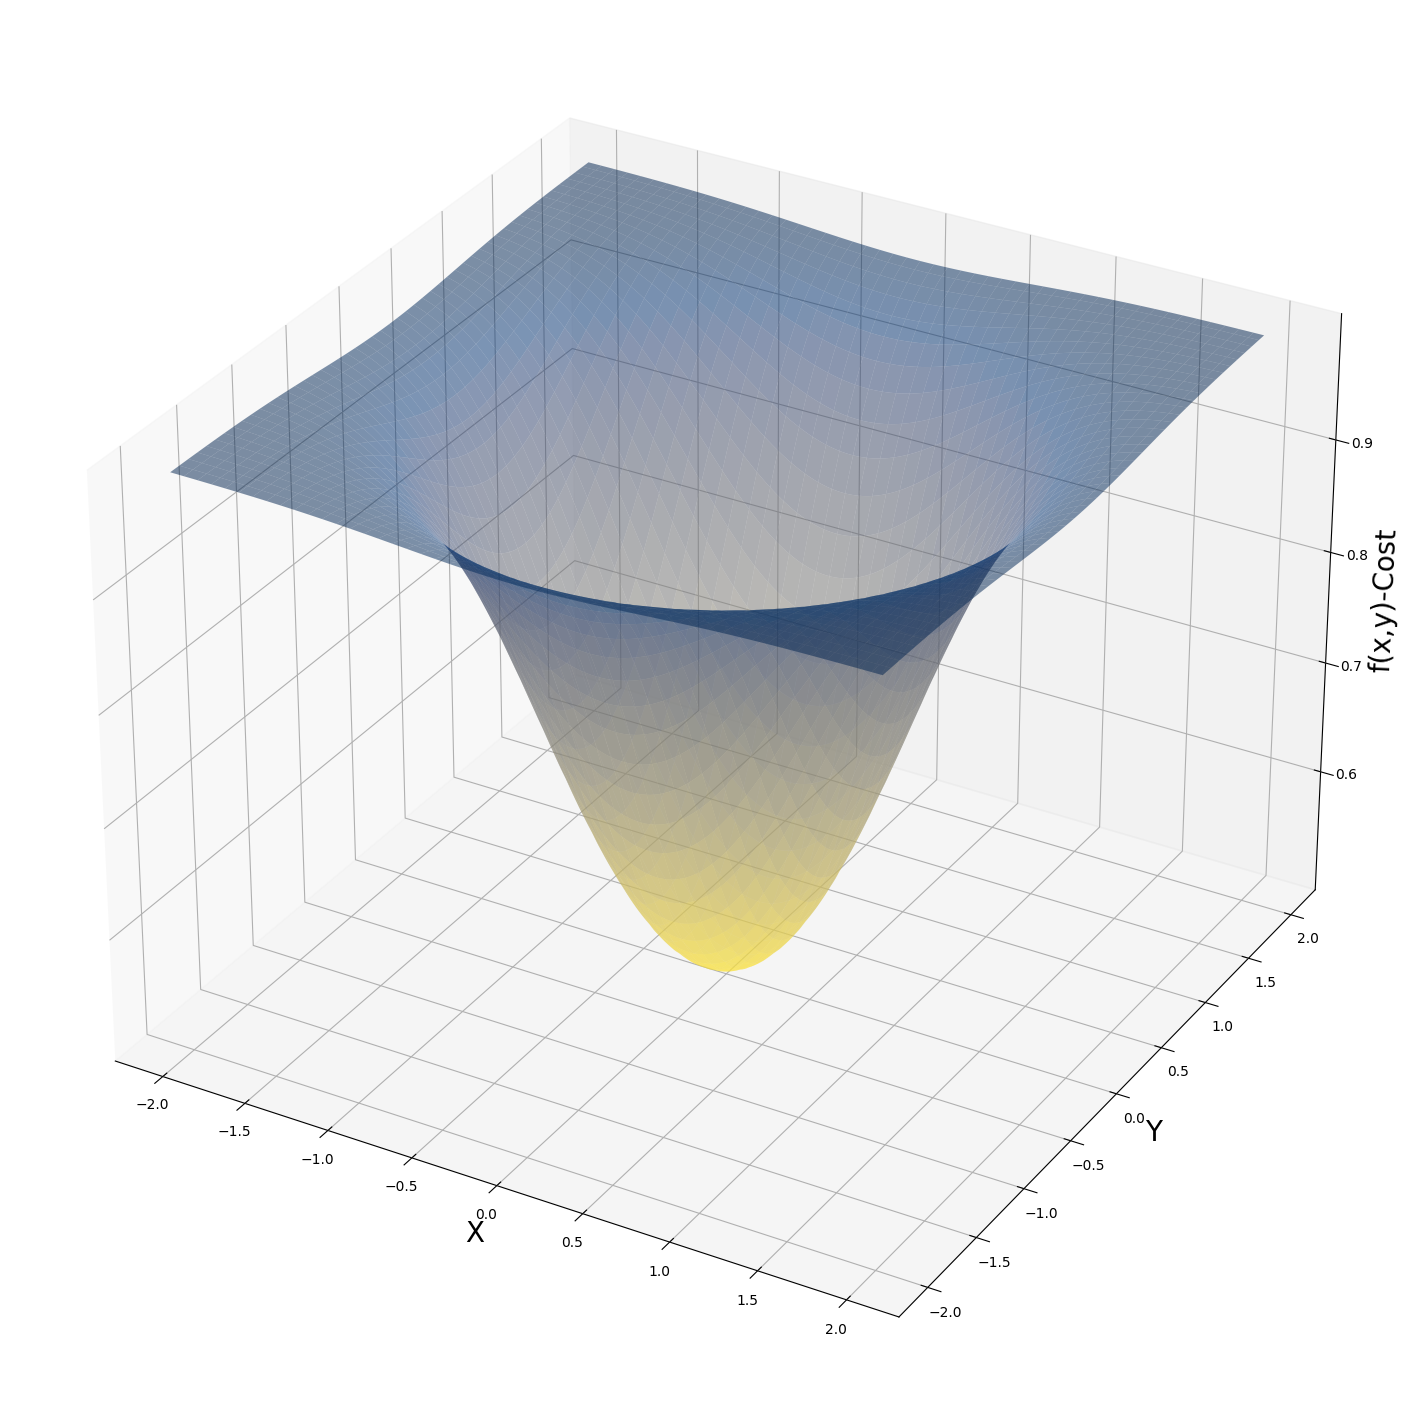

In [17]:
def f(x, y): 
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

# Make Data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

# 3D Plot
fig = plt.figure(figsize=(18, 20))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x,y)-Cost", fontsize=20)
x_4, y_4 = np.meshgrid(x_4, y_4)
ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap = cm.cividis_r, alpha =0.5)
plt.show()

## Partial derivative and Symbolic computation

for X  $$ \frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 -y^2}} {\left( 3^{-x^2-y^2}+1 \right) ^2}$$
 for Y $$ \frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 -y^2}} {\left( 3^{-x^2-y^2}+1 \right) ^2}$$

In [18]:
a,b = symbols('x,y')
print("Cost function ",f(a,b))
print("Partial derivative respect a ",diff(f(a,b),a))
print("Value of f(x,y) ",(f(a,b),a))
value_of_f = f(a,b).evalf(subs={a:1.8, b:1.0})
print("Value of f(x,y) ",value_of_f)
value_of_diff =diff(f(a,b),a).evalf(subs={a:1.8, b:1.0})
print("Value of diff(x,y) ",value_of_diff)



Cost function  1/(3**(-x**2 - y**2) + 1)
Partial derivative respect a  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y)  (1/(3**(-x**2 - y**2) + 1), x)
Value of f(x,y)  0.990604794032582
Value of diff(x,y)  0.0368089716197505


# Batch Gradient Descent with SimPy

In [19]:
#setup
multiplier= 0.1
max_iter = 400
params = np.array([1.8, 1.0]) #initial guess
for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
                                      
# results
print('Values in gradient: ', gradients)
print('Minimum at x: ', params[0])
print('Minimum at y: ', params[1])
print('Cost: ', f(params[0],params[1]))
                                      

Values in gradient:  [5.71287516047952e-9 3.17381953359973e-9]
Minimum at x:  9.82887861973314e-9
Minimum at y:  5.46048812207397e-9
Cost:  0.500000000000000


# Batch Gradient Descent only python

In [20]:
# Partial derivatives in python
def fpx(x,y):
    r = 3**(-x**2  -y**2)
    return 2*x*math.log(3)*r/ (r+1)**2

def fpy(x,y): 
    r = 3**(-x**2  -y**2)
    return 2*y*math.log(3)*r/ (r+1)**2

In [21]:
#setup
multiplier= 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess
for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
                                      
# results
print('Values in gradient: ', gradients)
print('Minimum at x: ', params[0])
print('Minimum at y: ', params[1])
print('Cost: ', f(params[0],params[1]))


Values in gradient:  [2.01013038e-11 1.11673910e-11]
Minimum at x:  3.458385998858304e-11
Minimum at y:  1.9213255549212797e-11
Cost:  0.5


## Graph 3D Gradient Descent & Adv Numpy Arrays

In [22]:
#setup
multiplier= 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    # alternative to append
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
                                      
# results
print('Values in gradient: ', gradients)
print('Minimum at x: ', params[0])
print('Minimum at y: ', params[1])
print('Cost: ', f(params[0],params[1]))


Values in gradient:  [2.01013038e-11 1.11673910e-11]
Minimum at x:  3.458385998858304e-11
Minimum at y:  1.9213255549212797e-11
Cost:  0.5


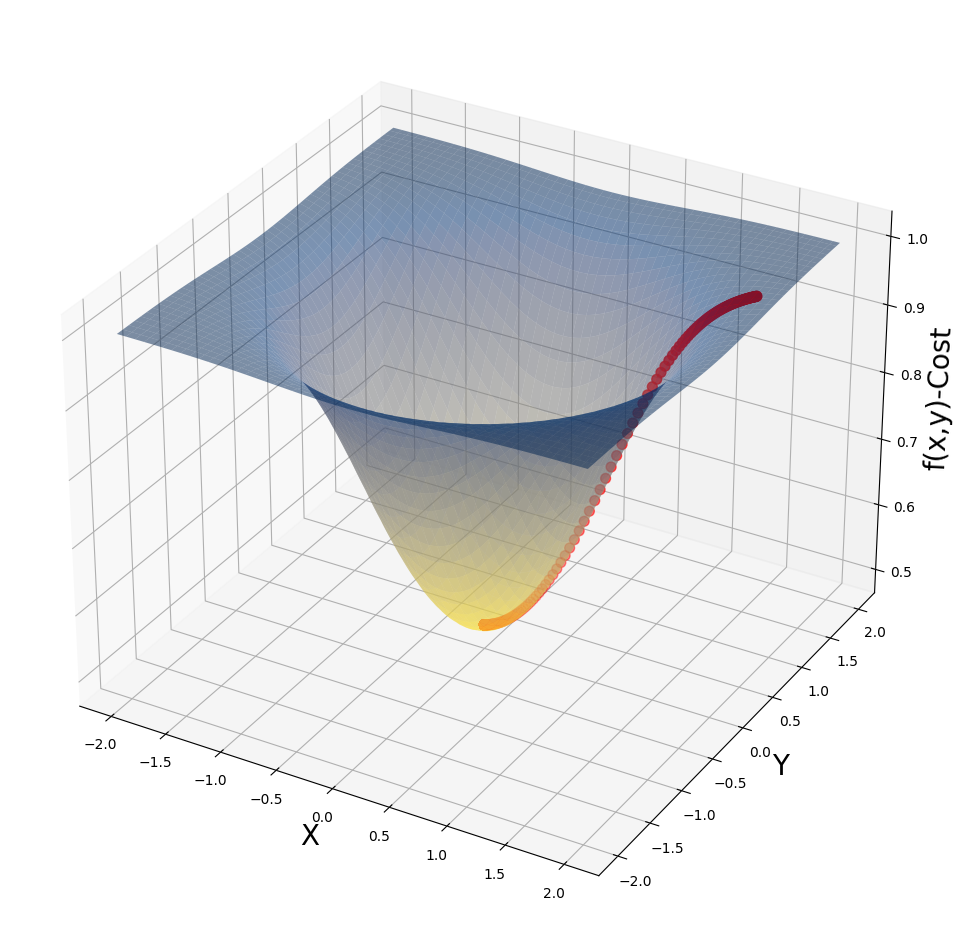

In [23]:
# 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x,y)-Cost", fontsize=20)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]),s=50, color='red')

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap = cm.cividis_r, alpha =0.5)
plt.show()

## Residual Sum of Squares - Mean Square function ( cost function regression )

$$ RSS = \sum_{i=n}^{n} \big( y^{(i)}-h_\theta x^{(i)} \big)^2 $$

$$ MSE = \frac{1}{n} \sum_{i=n}^{n} \big( y^{(i)}-h_\theta x^{(i)} \big)^2 $$

$$ or $$

$$ MSE = \frac{1}{n} \sum_{i=n}^{n} \big( y -\hat{y} \big)^2 $$

In [24]:
# Make data

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5 ]]).reshape(7,1)
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2 ]]).reshape(7,1)

regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


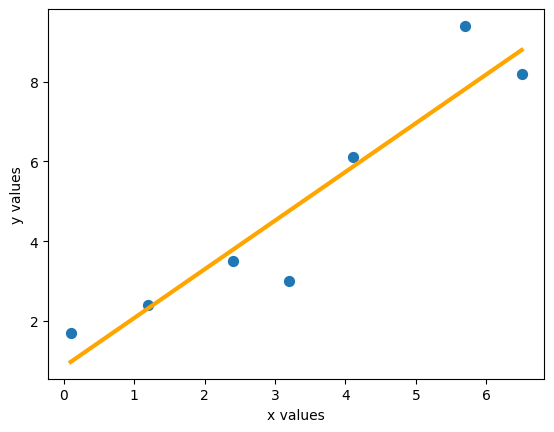

In [25]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [33]:
# y_hat = theta0 +theta1*x
y_hat = 0.8475351486029545+1.2227264637835913*x_5
print(y_hat)

[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [47]:
def mse(y, y_hat):
   #mse_calc= (1/len(y))*sum((y-y_hat)**2)
   mse_calc = np.average((y-y_hat)**2, axis=0)
   return mse_calc

print("manual MSE ", mse(y_5,y_hat))
print("sklearn MSE ",mean_squared_error(y_5, y_hat) )
print("sklearn MSE predict",mean_squared_error(y_5, regr.predict(x_5)) )

manual MSE  [0.94796558]
sklearn MSE  0.9479655759794577
sklearn MSE predict 0.9479655759794577
